#  Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
# Rename the columns name
df.columns=['Region','Date','Frequency','Unemployment_Rate','Employed','Labour_Participation_Rate','Area']

# Remove frequency column
df=df.drop('Frequency' , axis='columns')

df.head()

,Region,Date,Unemployment_Rate,Employed,Labour_Participation_Rate,Area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.68,Rural


In [11]:
df.duplicated().sum()

27

In [12]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

In [13]:
df.isnull().sum()

Region                       1
Date                         1
Unemployment_Rate            1
Employed                     1
Labour_Participation_Rate    1
Area                         1
dtype: int64

In [15]:
# by observing row 359 is empty
df.drop(359 , axis=0 , inplace=True)
df.isnull().sum()

Region                       0
Date                         0
Unemployment_Rate            0
Employed                     0
Labour_Participation_Rate    0
Area                         0
dtype: int64

# Visualization

In [19]:
import klib

GridSpec(6, 3)

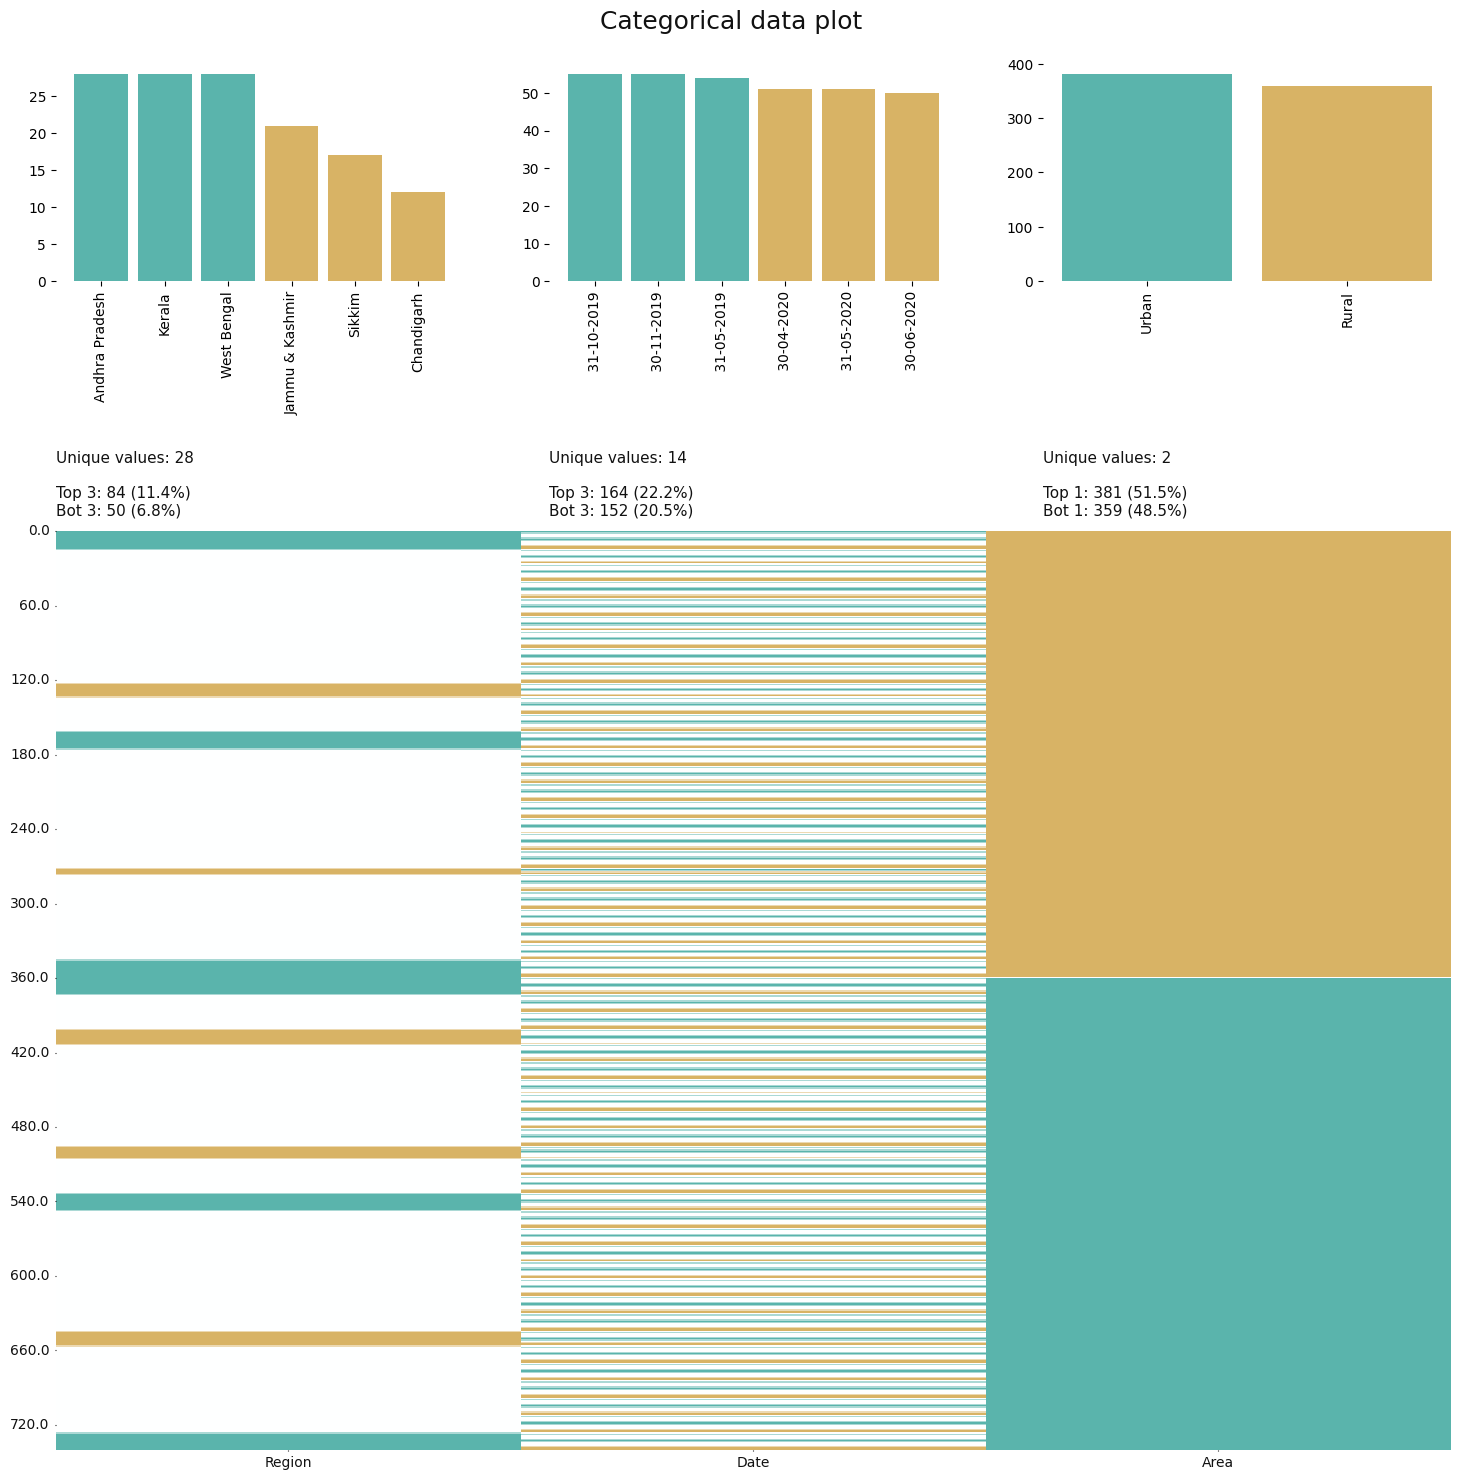

In [22]:
klib.cat_plot(df)

In [23]:
klib.corr_mat(df)

,Unemployment_Rate,Employed,Labour_Participation_Rate
Unemployment_Rate,1.00,-0.22,0.00
Employed,-0.22,1.00,0.01
Labour_Participation_Rate,0.00,0.01,1.00


<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

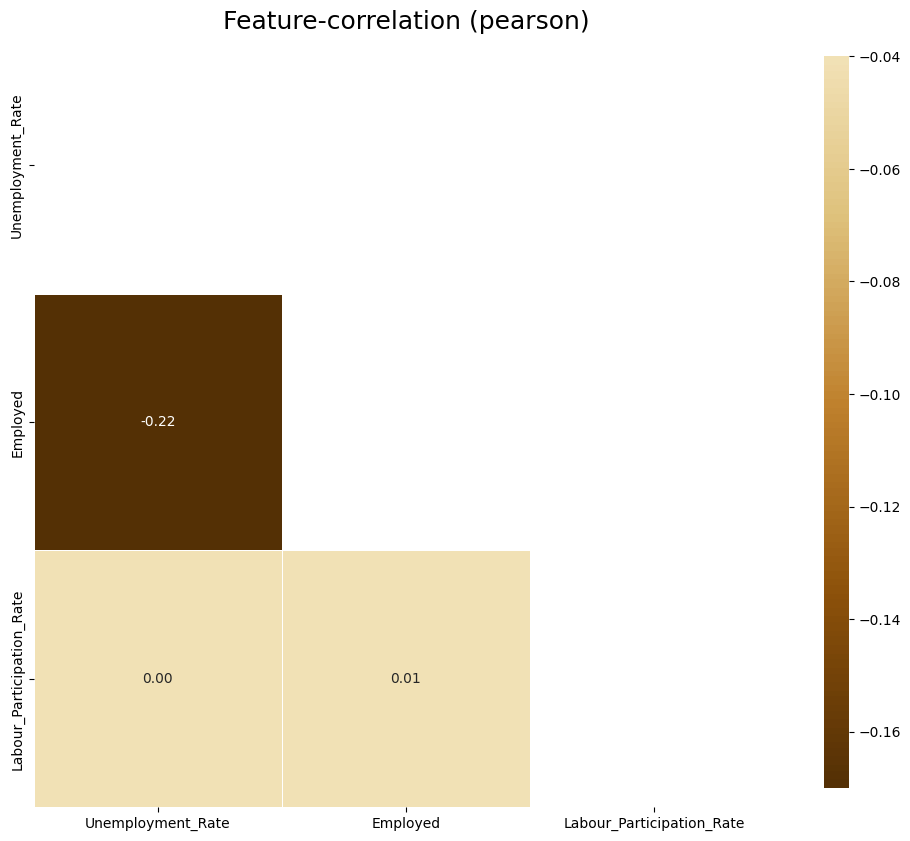

In [24]:
klib.corr_plot(df)

<AxesSubplot: xlabel='Unemployment_Rate', ylabel='Density'>

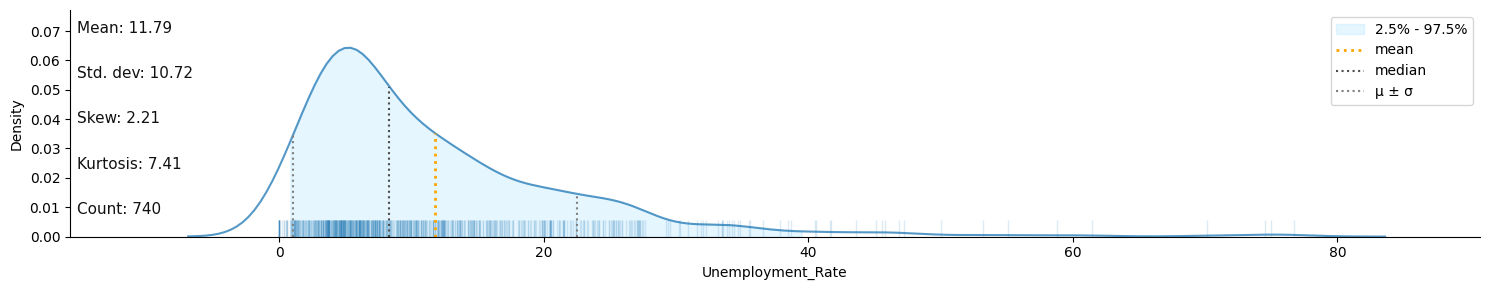

In [26]:
klib.dist_plot(df)

In [27]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [28]:
klib.data_cleaning(df)

Shape of cleaned data: (740, 6) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-66.67%)



,region,date,unemployment_rate,employed,labour_participation_rate,area
0,Andhra Pradesh,31-05-2019,3.65,11999139.0,43.240002,Rural
1,Andhra Pradesh,30-06-2019,3.05,11755881.0,42.049999,Rural
2,Andhra Pradesh,31-07-2019,3.75,12086707.0,43.500000,Rural
3,Andhra Pradesh,31-08-2019,3.32,12285693.0,43.970001,Rural
4,Andhra Pradesh,30-09-2019,5.17,12256762.0,44.680000,Rural
...,...,...,...,...,...,...
735,West Bengal,29-02-2020,7.55,10871168.0,44.090000,Urban
736,West Bengal,31-03-2020,6.67,10806105.0,43.340000,Urban
737,West Bengal,30-04-2020,15.63,9299466.0,41.200001,Urban
738,West Bengal,31-05-2020,15.22,9240903.0,40.669998,Urban


In [49]:
df.columns

Index(['region', 'date', 'unemployment_rate', 'employed',
       'labour_participation_rate', 'area'],
      dtype='object')

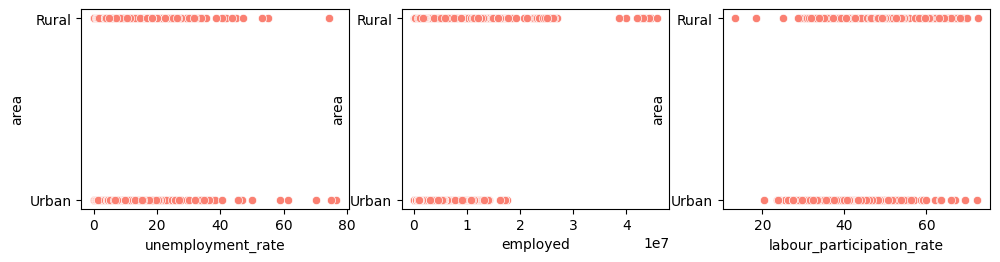

In [64]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(20,15))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.scatterplot(data=df, x=columns[i], y='area', color='salmon')
plt.show()

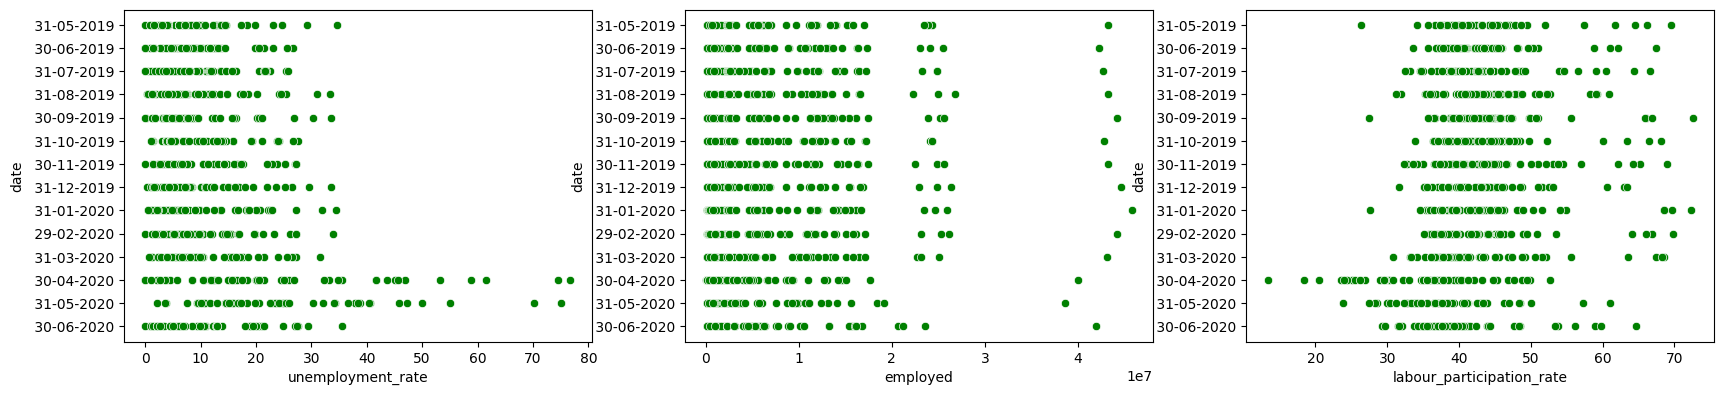

In [62]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(35,25))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.scatterplot(data=df, x=columns[i], y='date', color='green')
plt.show()

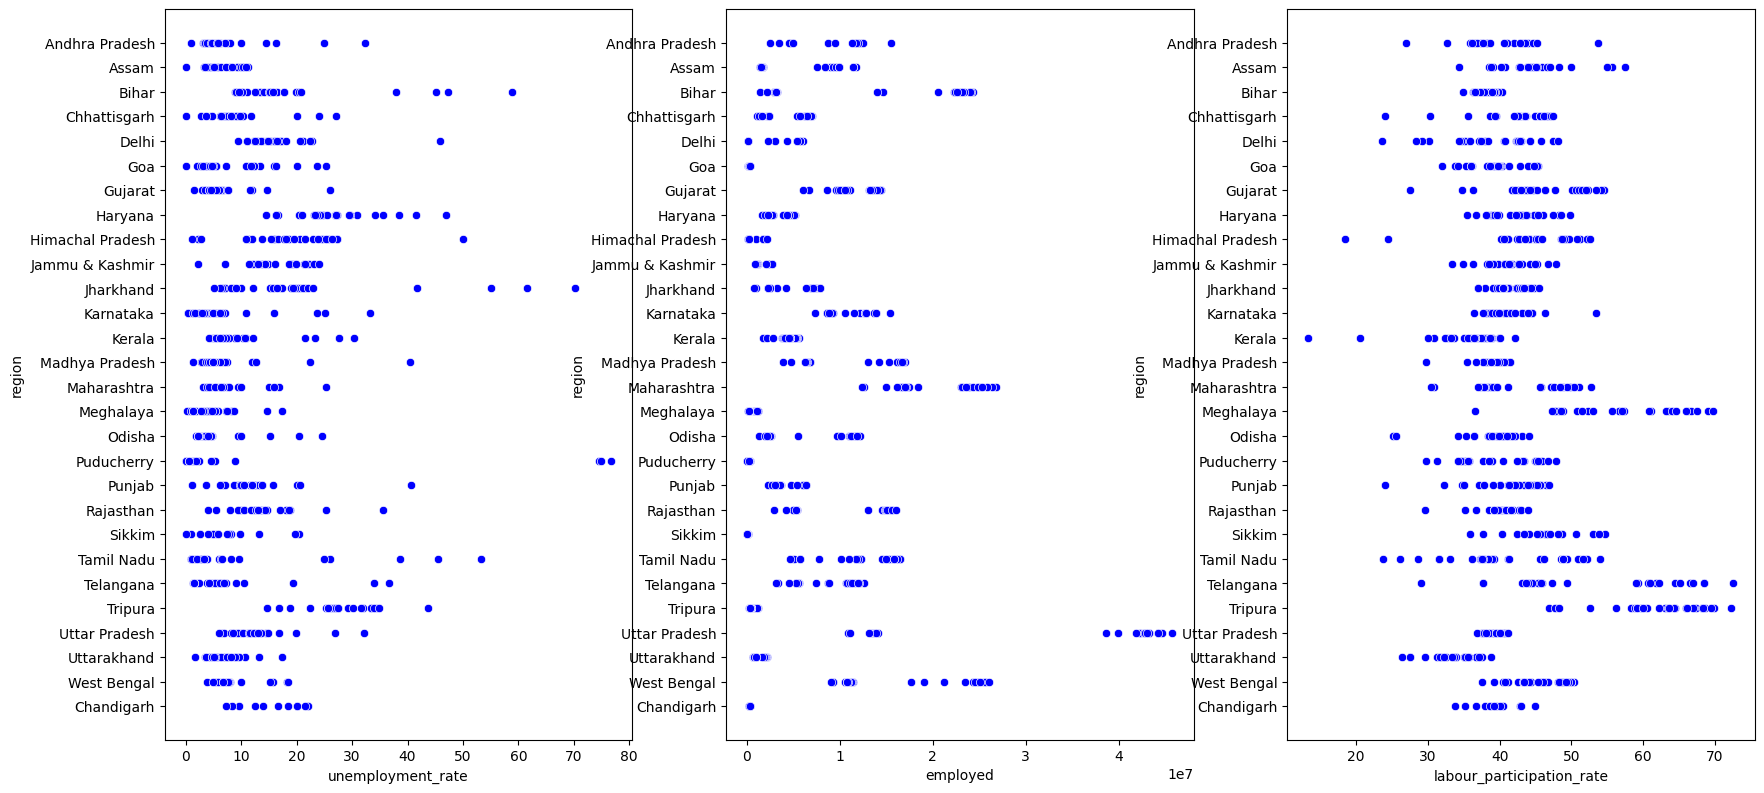

In [99]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(35,55))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.scatterplot(data=df, x=columns[i], y='region', color='blue')
plt.show()

C:\Users\91811\AppData\Local\Temp\ipykernel_19988\1150832963.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

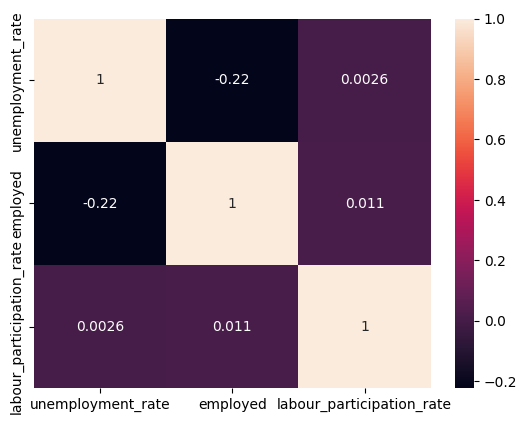

In [80]:
sns.heatmap(df.corr() , annot=True)

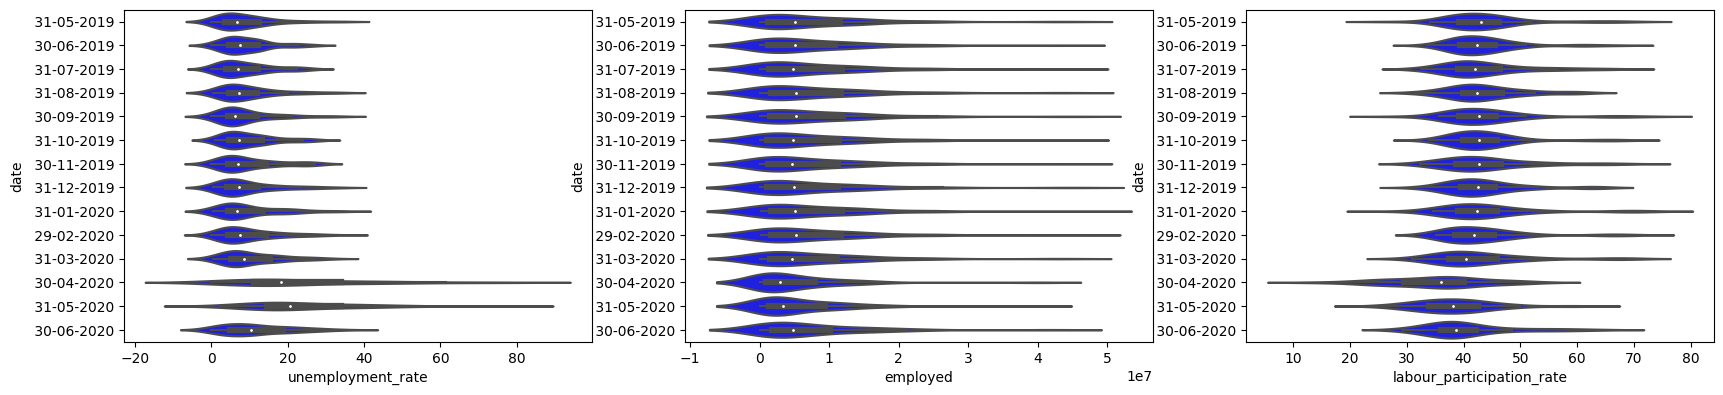

In [89]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(35,25))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.violinplot(data=df, x=columns[i], y='date', color='blue')
plt.show()

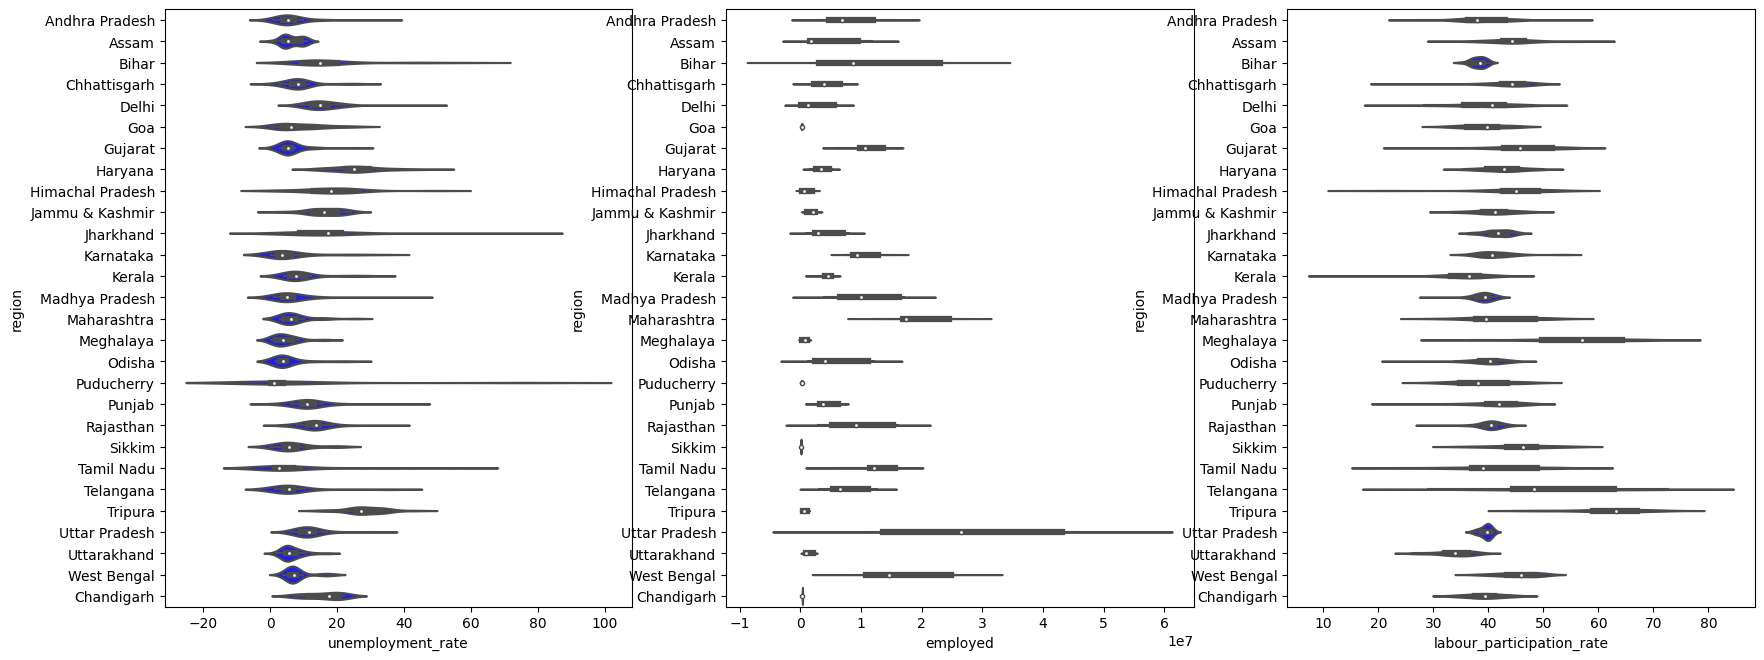

In [97]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(35,45))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.violinplot(data=df, x=columns[i], y='region', color='blue')
plt.show()

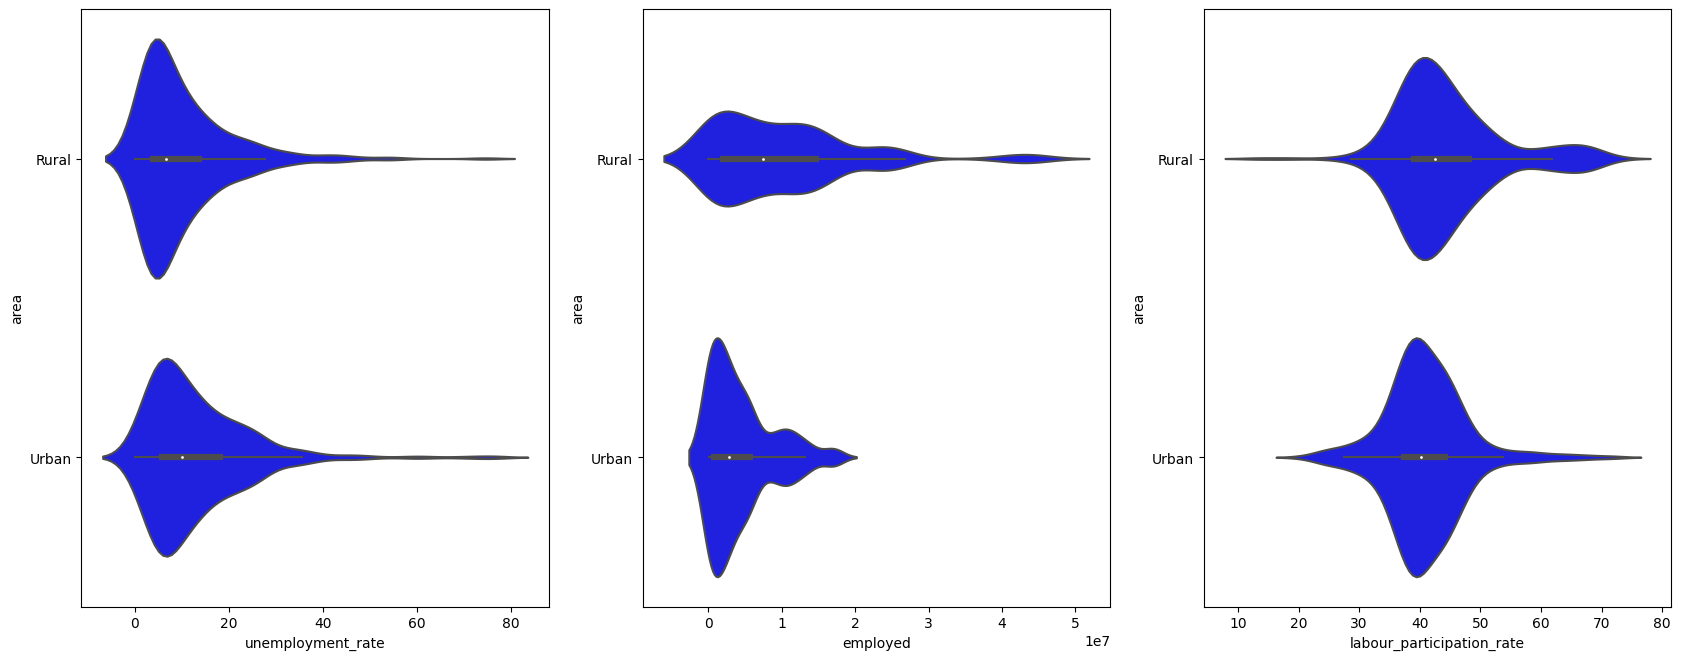

In [98]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(35,45))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.violinplot(data=df, x=columns[i], y='area', color='blue')
plt.show()

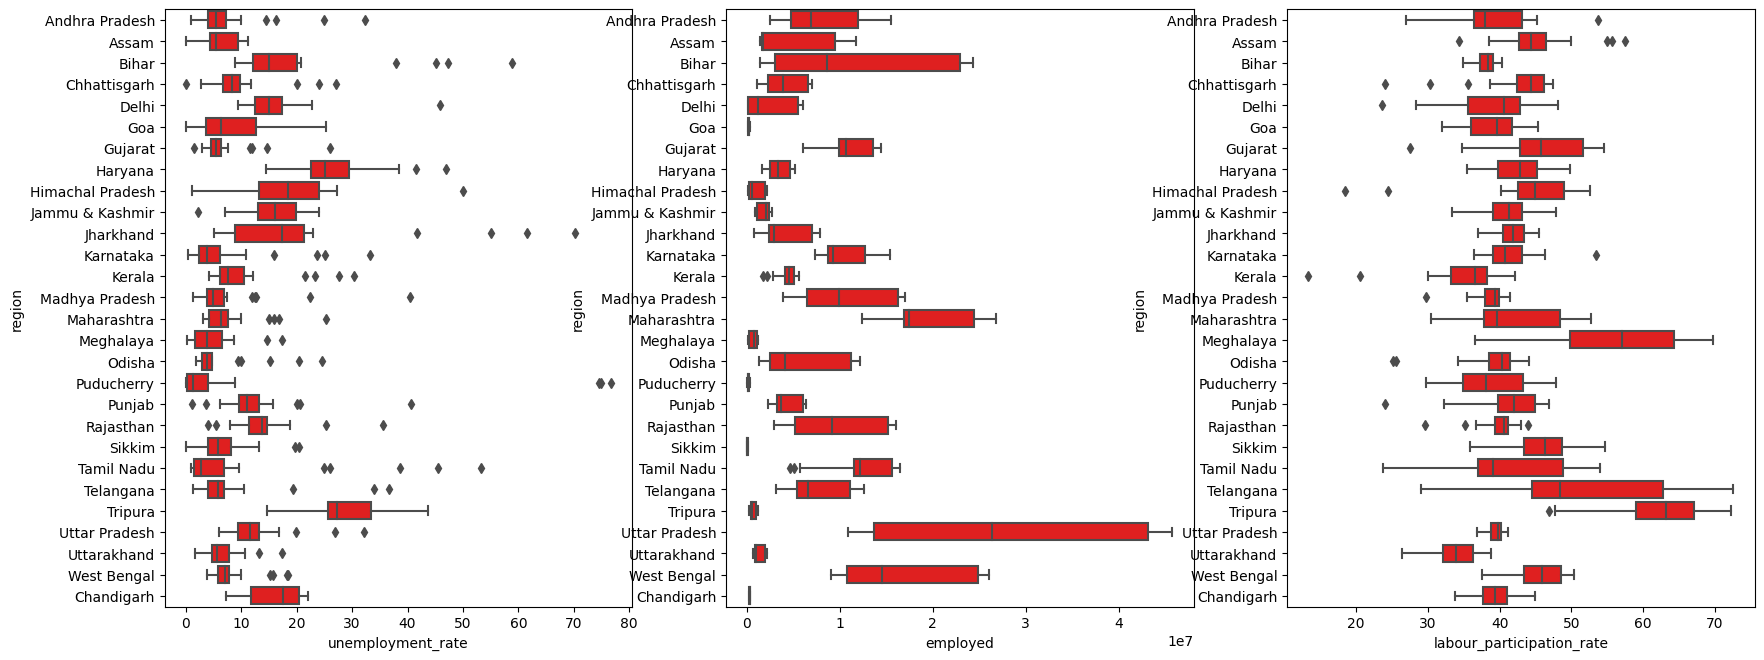

In [106]:
columns=['unemployment_rate', 'employed' ,'labour_participation_rate']
plt.figure(figsize=(35,45))
for i in range(3):
    plt.subplot(5, 5, i + 1) 
    sns.boxplot(data=df, x=columns[i], y='region', color='red')
plt.show()

# Conclusion

After EDA we concluded that UP and Maharastra are most preferred employment destination.
unemployment in urban region is unstable and in rural it's comparetively more stable.
After pandemic both rural and urban region unemployment increased dractically